In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("delivery_time.csv")
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### EDA and data visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
df=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
from scipy.stats import skew
print(skew(df.delivery_time))

0.326702631656106


<Axes: >

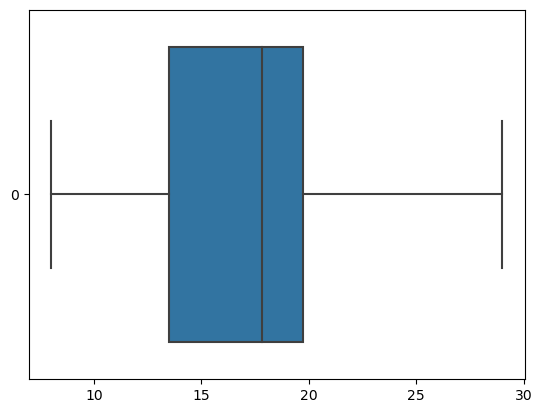

In [8]:
sns.boxplot(df['delivery_time'], orient = 'h')

<Axes: xlabel='delivery_time', ylabel='Density'>

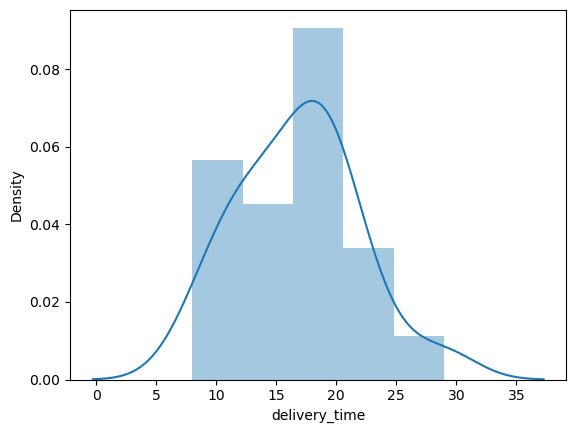

In [9]:
sns.distplot(df['delivery_time'])

In [10]:
print(skew(df.sorting_time))

0.043680994983108075


<Axes: >

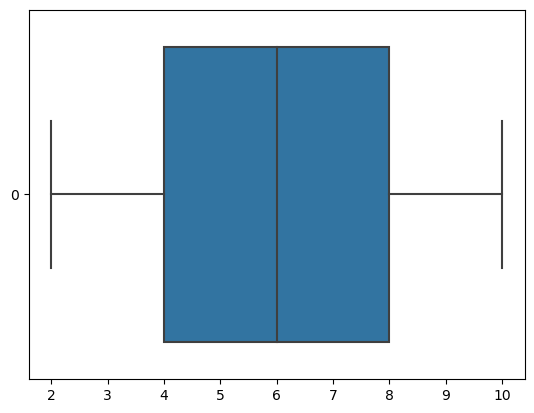

In [11]:
sns.boxplot(df['sorting_time'], orient='h')

<Axes: xlabel='sorting_time', ylabel='Density'>

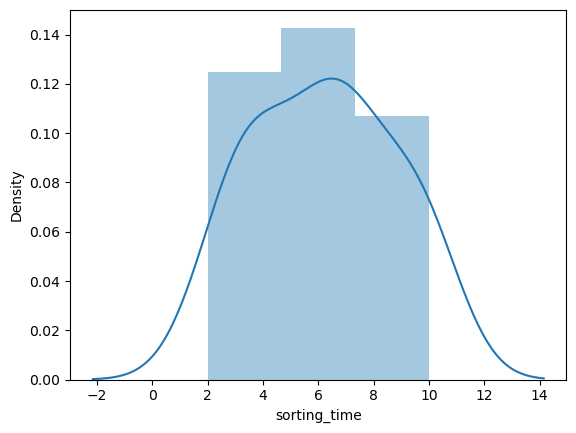

In [12]:
sns.distplot(df['sorting_time'])

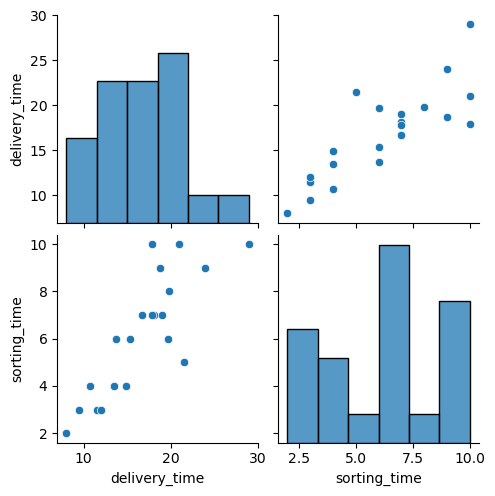

In [13]:
sns.pairplot(df)

#### Correlation analysis

In [14]:

df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

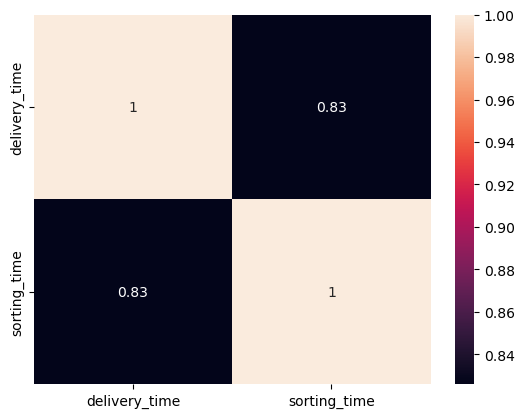

In [15]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

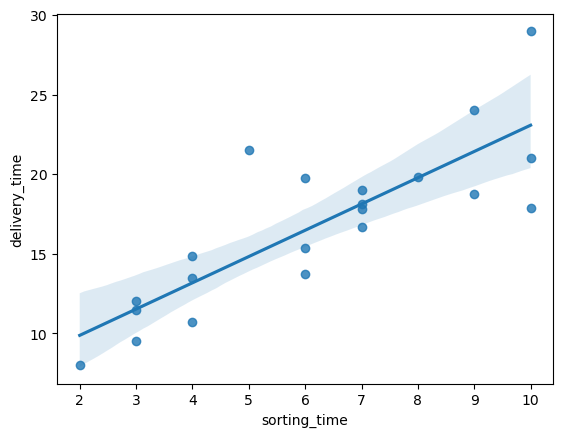

In [16]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

#### Model building

In [19]:

model1=smf.ols("delivery_time~sorting_time",data=df).fit()

#### Model testing

In [20]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model1.tvalues , model1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        09:57:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Model Prediction

In [24]:
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [25]:
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [27]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

In [28]:
model=smf.ols("delivery_time~sorting_time",data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           3.98e-06
Time:                        09:58:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model1=smf.ols("delivery_time~np.log(sorting_time)", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           2.64e-06
Time:                        09:58:16   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 28 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                           09:58:21   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model3=smf.ols("np.log(delivery_time)~np.square(sorting_time)",data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.621
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                     31.18
Date:                   Thu, 28 Mar 2024   Prob (F-statistic):           2.20e-05
Time:                           09:58:24   Log-Likelihood:                 4.9564
No. Observations:                     21   AIC:                            -5.913
Df Residuals:                         19   BIC:                            -3.824
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4290      0.076     32.014      0.000       2.270       2.588
np.square(sorting_time)     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model4=smf.ols("np.square(delivery_time)~np.square(sorting_time)",data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(delivery_time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Thu, 28 Mar 2024   Prob (F-statistic):           4.99e-05
Time:                              09:58:26   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(sorting_time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model5=smf.ols("np.square(np.log(delivery_time))~np.square(np.log(sorting_time))",data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     np.square(np.log(delivery_time))   R-squared:                       0.728
Model:                                          OLS   Adj. R-squared:                  0.714
Method:                               Least Squares   F-statistic:                     50.94
Date:                              Thu, 28 Mar 2024   Prob (F-statistic):           8.74e-07
Time:                                      09:58:29   Log-Likelihood:                -27.099
No. Observations:                                21   AIC:                             58.20
Df Residuals:                                    19   BIC:                             60.29
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           4.6788      0.481      9.725      0.000       3.672       5.686
np.square(np.log(sorting_time))     0.9752      0.137      7.137      0.000       0.689       1.261
==============================================================================
Omnibus:                        2.507   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                1.450
Skew:                           0.642   Prob(JB):                        0.484
Kurtosis:                       3.105   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:

print("R_squared = ", model2.rsquared)

R_squared =  0.77216134926874
